In [83]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [84]:
df = pd.DataFrame()

In [85]:
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [86]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [87]:
x = df.iloc[: ,0:2].values
y = df.iloc[: ,-1].values

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1)

In [89]:
dt.fit(x ,y)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot:>

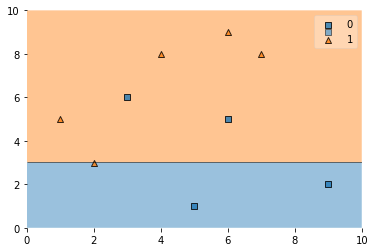

In [90]:
plot_decision_regions(x ,y ,clf =dt)

In [91]:
df['ypred'] = dt.predict(x)

In [92]:
df['weights'] = 1 / df.shape[0]

In [93]:
df

,x1,x2,label,ypred,weights
0,1,5,1,1,0.1
1,2,3,1,1,0.1
2,3,6,0,1,0.1
3,4,8,1,1,0.1
4,5,1,0,0,0.1
5,6,9,1,1,0.1
6,6,5,0,1,0.1
7,7,8,1,1,0.1
8,9,9,0,1,0.1
9,9,2,0,0,0.1


In [96]:
def alpha(error):
    return 0.5*np.log((1-error)/error)

In [97]:
alpha(0.3)

0.42364893019360184

In [99]:
def update(row ,error =0.423):
    if row['label'] == row['ypred']:
        return row['weights'] * np.exp(-error)
    else:
        return row['weights'] * np.exp(error)

In [100]:
df['updated'] = df.apply(update ,axis=1)

In [101]:
df

,x1,x2,label,ypred,weights,updated
0,1,5,1,1,0.1,0.065508
1,2,3,1,1,0.1,0.065508
2,3,6,0,1,0.1,0.152653
3,4,8,1,1,0.1,0.065508
4,5,1,0,0,0.1,0.065508
5,6,9,1,1,0.1,0.065508
6,6,5,0,1,0.1,0.152653
7,7,8,1,1,0.1,0.065508
8,9,9,0,1,0.1,0.152653
9,9,2,0,0,0.1,0.065508


In [102]:
df['norm'] = df['updated'] / df['updated'].sum()

In [103]:
df['freq'] = np.cumsum(df['norm'])

In [104]:
df['lower'] = df['freq'] - df['norm']

In [105]:
df

,x1,x2,label,ypred,weights,updated,norm,freq,lower
0,1,5,1,1,0.1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,1,0.1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,1,0.1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,1,0.1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0,0.1,0.065508,0.071475,0.452458,0.380983
5,6,9,1,1,0.1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,1,0.1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,1,0.1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,1,0.1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0,0.1,0.065508,0.071475,1.000000,0.928525


In [122]:
def fetch(df):
    indices =[]
    for i in range (df.shape[0]):
        a = np.random.random()
        for index , row in df.iterrows():
            if row['freq'] >a and a> row['lower']:
                indices.append(index)
    return indices

In [123]:
indices=fetch(df)

In [124]:
df2 = df.iloc[indices ,[0,1,2,3]]

In [125]:
df2

,x1,x2,label,ypred
7,7,8,1,1
6,6,5,0,1
3,4,8,1,1
7,7,8,1,1
7,7,8,1,1
1,2,3,1,1
9,9,2,0,0
4,5,1,0,0
1,2,3,1,1
8,9,9,0,1


In [126]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [127]:
x = df2.iloc[: ,0:2].values
y = df2.iloc[: ,2].values

In [128]:
dt2.fit(x ,y)

DecisionTreeClassifier(max_depth=1)

In [129]:
df2['ypred']=dt2.predict(x)

In [130]:
df2

,x1,x2,label,ypred
7,7,8,1,1
6,6,5,0,1
3,4,8,1,1
7,7,8,1,1
7,7,8,1,1
1,2,3,1,1
9,9,2,0,0
4,5,1,0,0
1,2,3,1,1
8,9,9,0,1


In [135]:
error2=alpha(0.3)
error2

0.42364893019360184

In [136]:
inp = np.array([9,9]).reshape(1,2)

In [137]:
dt1.predict(inp)

array([0])

In [138]:
dt2.predict(inp)

array([1])

In [131]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=500)

In [132]:
abc.fit(x,y)
abc.predict(x)

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0])

In [133]:
y

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0])